# Imbalance Learning (SMOTE)

The training dataset is imbalanced: More honest players than cheaters.


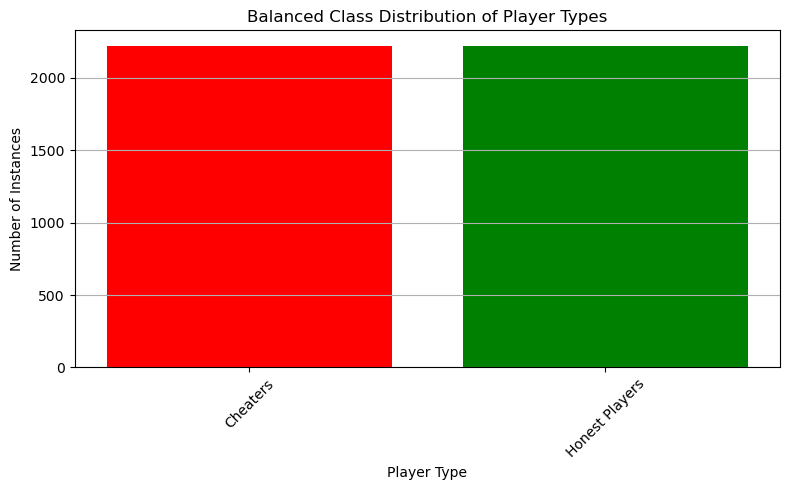

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load data from JSON files
with open('player_view_data_cheaters.json') as f:
    cheater_data = json.load(f)

with open('player_view_data_honest.json') as f:
    honest_data = json.load(f)

# Prepare the data for analysis
cheater_count = len(cheater_data)
honest_count = len(honest_data)

# Create a DataFrame with labels (0 for Cheaters, 1 for Honest Players)
X = pd.DataFrame({'Player Type': [0] * cheater_count + [1] * honest_count})  # Features (dummy column)
y = pd.Series([0] * cheater_count + [1] * honest_count)  # Labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for imbalance and print message
if sum(y_train == 0) > sum(y_train == 1):
    print("The training dataset is imbalanced: More cheaters than honest players.")
elif sum(y_train == 1) > sum(y_train == 0):
    print("The training dataset is imbalanced: More honest players than cheaters.")
else:
    print("The training dataset is balanced: Equal number of cheaters and honest players.")

# Apply SMOTE to balance the training dataset only
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Count the new distribution after SMOTE
new_cheater_count = sum(y_resampled == 0)
new_honest_count = sum(y_resampled == 1)

# Create a DataFrame for visualization after SMOTE
balanced_data = {'Player Type': ['Cheaters', 'Honest Players'], 'Count': [new_cheater_count, new_honest_count]}
df_balanced = pd.DataFrame(balanced_data)

# Plotting the balanced class distribution
plt.figure(figsize=(8, 5))
plt.bar(df_balanced['Player Type'], df_balanced['Count'], color=['red', 'green'])
plt.title('Balanced Class Distribution of Player Types')
plt.xlabel('Player Type')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Part One: Less Features/Data

# Random Forest Algorithm (Baseline- Accuracy 56%, Recall 39%, Precision 12% ) - First Trial

In [26]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation
y_pred = model.predict(X_test)

# Metrics calculation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [27]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.56
Precision: 0.12
Recall: 0.39
F1 Score: 0.18


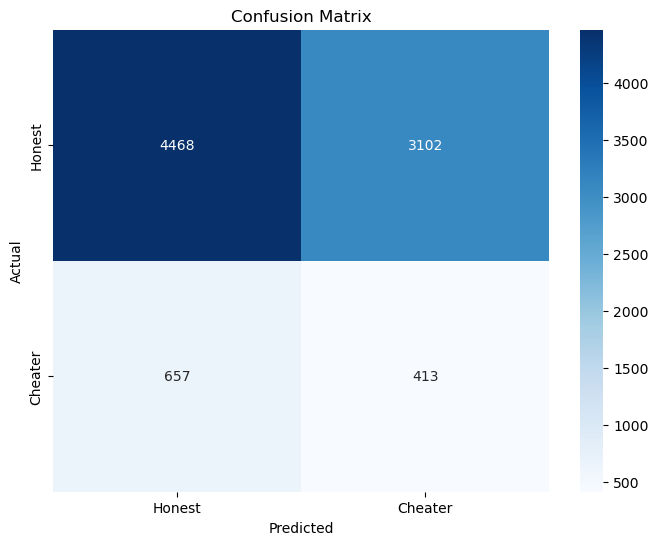

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Honest', 'Cheater'], yticklabels=['Honest', 'Cheater'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from collections import Counter
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [39]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
# Load JSON data
def load_data(cheater_file, honest_file):
    with open(cheater_file) as f:
        cheaters_data = json.load(f)
    with open(honest_file) as f:
        honest_data = json.load(f)
    return cheaters_data, honest_data


In [41]:
# Preprocess data to extract features and labels
def preprocess_data(data, label):
    records = []
    for steam_id, matches in data.items():
        for match_id, events in matches.items():
            for event in events:
                if 'view_vel' in event and 'view_acc' in event:
                    records.append({
                        'view_vel': np.mean(event['view_vel']),  # Mean of view_vel list
                        'view_acc': np.mean(event['view_acc']),  # Mean of view_acc list
                        'label': label  # 1 for cheater, 0 for honest
                    })
    return pd.DataFrame(records)

In [42]:
# Load data
cheaters_data, honest_data = load_data('player_view_data_cheaters.json', 'player_view_data_honest.json')

In [43]:
# Preprocess data
cheaters_df = preprocess_data(cheaters_data, label=1)
honest_df = preprocess_data(honest_data, label=0)

In [44]:
# Combine datasets and shuffle
combined_df = pd.concat([cheaters_df, honest_df]).sample(frac=1).reset_index(drop=True)

Original class distribution: Counter({0: 37804, 1: 5394})


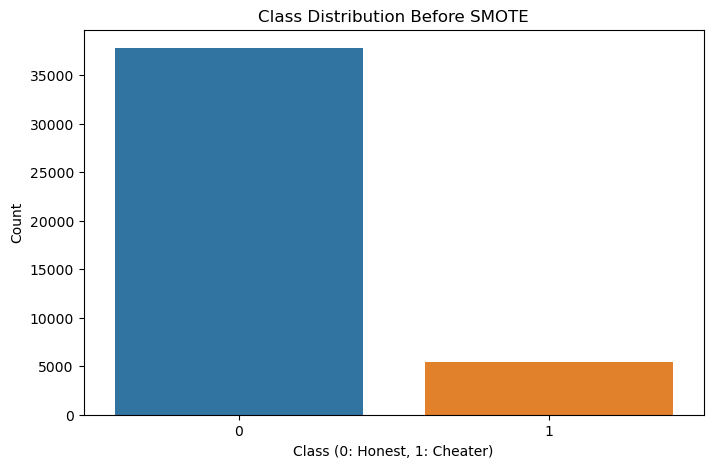

In [45]:
# Check class distribution before SMOTE
print("Original class distribution:", Counter(combined_df['label']))

# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()


In [46]:
# Split the data into features and labels
X = combined_df[['view_vel', 'view_acc']].values  # Features as NumPy array
y = combined_df['label'].values

# Check shapes of X and y to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (43198, 2)
Shape of y: (43198,)


In [47]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

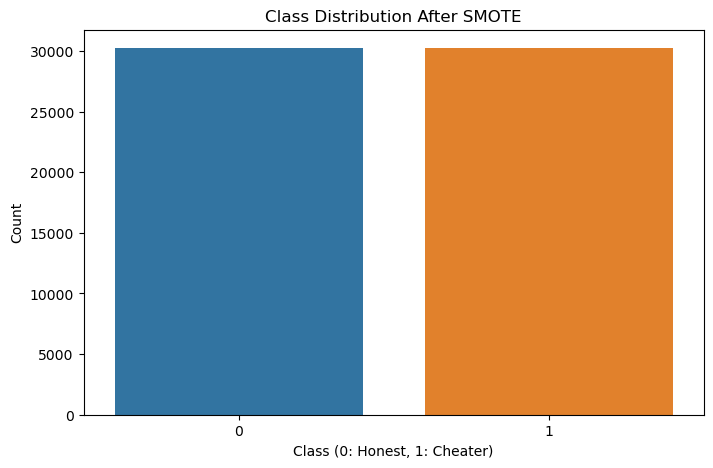

In [49]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()


# Gaussian Naive Bayes (Baseline- Accuracy 40%, Recall 62%, Precision 13%)

Class distribution after SMOTE: [26508 26508]
Accuracy: 0.40
Precision: 0.13
Recall: 0.62


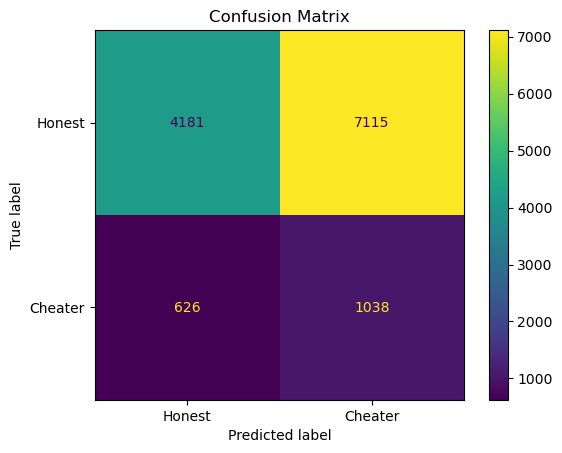

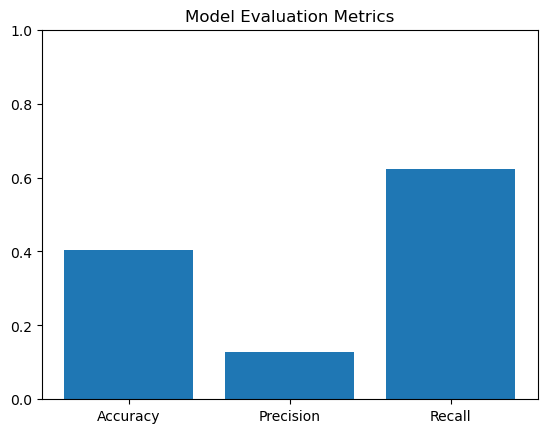

In [10]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Changed to Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # Added StandardScaler

# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'label': label
                })
    return flattened_data

# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection - ONLY view_vel
features = ['view_vel']
X = df[features]
y = df['label']


# Scale the features - VERY IMPORTANT for Naive Bayes
scaler = StandardScaler()  # Initialize StandardScaler
X = scaler.fit_transform(X)  # Scale the features

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

# Train Gaussian Naive Bayes model
model = GaussianNB()  # Initialize Gaussian Naive Bayes
model.fit(X_train_res, y_train_res)  # Train the model

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])  # Added display_labels
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# Bernoulli Naive Bayes (Baseline- Accuracy 39%, Recall 65%, Precision 12%)

In [78]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [67]:
# Load JSON data
def load_data(cheater_file, honest_file):
    with open(cheater_file) as f:
        cheaters_data = json.load(f)
    with open(honest_file) as f:
        honest_data = json.load(f)
    return cheaters_data, honest_data

In [68]:
# Preprocess data to extract features and labels
def preprocess_data(data, label):
    records = []
    for steam_id, matches in data.items():
        for match_id, events in matches.items():
            for event in events:
                if 'view_vel' in event and isinstance(event['view_vel'], list):
                    records.append({
                        'view_vel': np.mean(event['view_vel']),  # Mean of view_vel list
                        'label': label  # 1 for cheater, 0 for honest
                    })
    return pd.DataFrame(records)

In [69]:
# Load data
cheaters_data, honest_data = load_data('player_view_data_cheaters.json', 'player_view_data_honest.json')

# Preprocess data
cheaters_df = preprocess_data(cheaters_data, label=1)
honest_df = preprocess_data(honest_data, label=0)

In [70]:
# Combine datasets and shuffle
combined_df = pd.concat([cheaters_df, honest_df]).sample(frac=1).reset_index(drop=True)

# Binarize 'view_vel' feature
mean_view_vel = combined_df['view_vel'].mean()
combined_df['view_vel'] = (combined_df['view_vel'] > mean_view_vel).astype(int)

Original class distribution: Counter({0: 37804, 1: 5394})


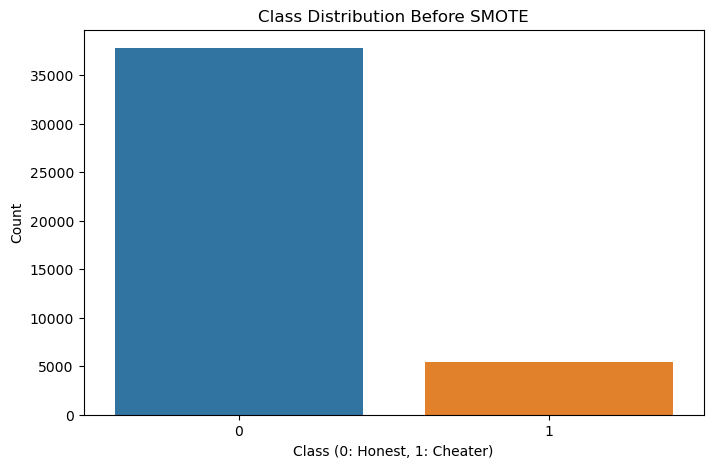

In [71]:
# Check class distribution before SMOTE
print("Original class distribution:", Counter(combined_df['label']))

# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()


In [72]:
# Split the data into features and labels
X = combined_df['view_vel'].values.reshape(-1, 1)  # Features as NumPy array
y = combined_df['label'].values

# Check shapes of X and y to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (43198, 1)
Shape of y: (43198,)


In [73]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [74]:
# Show the data distribution after applying SMOTE
print("Resampled training set class distribution:", Counter(y_train_resampled))



Resampled training set class distribution: Counter({0: 30237, 1: 30237})


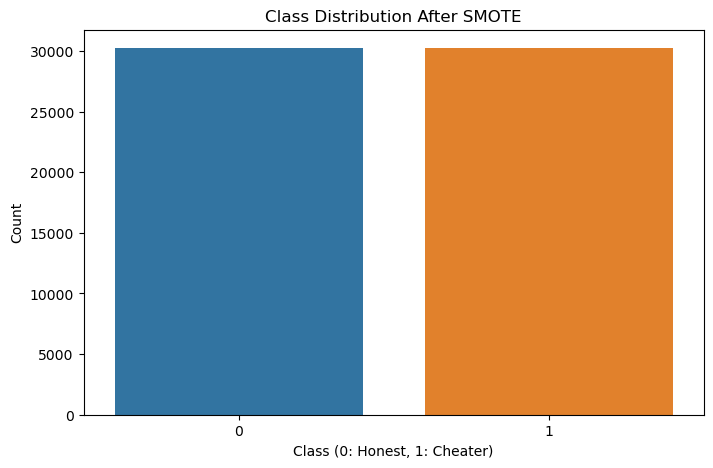

In [75]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()


In [76]:
# Train Bernoulli Naive Bayes Classifier
model_bnb = BernoulliNB()
model_bnb.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation
y_pred_bnb = model_bnb.predict(X_test)

# Metrics calculation for Bernoulli Naive Bayes model
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)

print(f"Bernoulli Naive Bayes - Accuracy: {accuracy_bnb:.2f}")
print(f"Bernoulli Naive Bayes - Precision: {precision_bnb:.2f}")
print(f"Bernoulli Naive Bayes - Recall: {recall_bnb:.2f}")
print(f"Bernoulli Naive Bayes - F1 Score: {f1_bnb:.2f}")

Bernoulli Naive Bayes - Accuracy: 0.39
Bernoulli Naive Bayes - Precision: 0.12
Bernoulli Naive Bayes - Recall: 0.65
Bernoulli Naive Bayes - F1 Score: 0.21


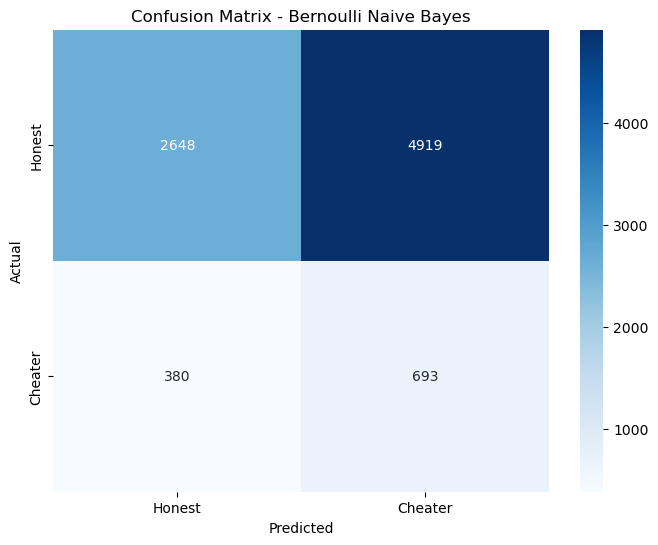

Classification Report - Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.87      0.35      0.50      7567
           1       0.12      0.65      0.21      1073

    accuracy                           0.39      8640
   macro avg       0.50      0.50      0.35      8640
weighted avg       0.78      0.39      0.46      8640



In [77]:
# Confusion matrix for Bernoulli Naive Bayes model
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Honest', 'Cheater'],
            yticklabels=['Honest', 'Cheater'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.show()

# Classification report for Bernoulli Naive Bayes model
report_bnb = classification_report(y_test, y_pred_bnb)
print("Classification Report - Bernoulli Naive Bayes:\n", report_bnb)


# Linear Discriminant Analysis (LDA)- (Accuracy 39%, Recall 64%, Precision 13%)

In [79]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter

In [80]:
# Load JSON data
def load_data(cheater_file, honest_file):
    with open(cheater_file) as f:
        cheaters_data = json.load(f)
    with open(honest_file) as f:
        honest_data = json.load(f)
    return cheaters_data, honest_data

In [81]:
# Preprocess data to extract features and labels
def preprocess_data(data, label):
    records = []
    for steam_id, matches in data.items():
        for match_id, events in matches.items():
            for event in events:
                if 'view_vel' in event and isinstance(event['view_vel'], list):
                    records.append({
                        'view_vel': np.mean(event['view_vel']),  # Mean of view_vel list
                        'label': label  # 1 for cheater, 0 for honest
                    })
    return pd.DataFrame(records)

In [82]:
# Load data
cheaters_data, honest_data = load_data('player_view_data_cheaters.json', 'player_view_data_honest.json')

# Preprocess data
cheaters_df = preprocess_data(cheaters_data, label=1)
honest_df = preprocess_data(honest_data, label=0)


In [83]:
# Combine datasets and shuffle
combined_df = pd.concat([cheaters_df, honest_df]).sample(frac=1).reset_index(drop=True)

# Check class distribution before SMOTE
print("Original class distribution:", Counter(combined_df['label']))

Original class distribution: Counter({0: 37804, 1: 5394})


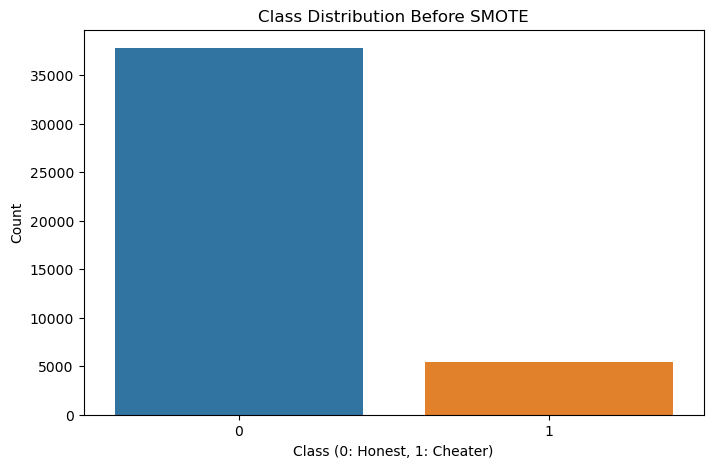

In [84]:
# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()

In [85]:
# Split the data into features and labels
X = combined_df['view_vel'].values.reshape(-1, 1)  # Features as NumPy array
y = combined_df['label'].values

In [86]:
# Check shapes of X and y to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (43198, 1)
Shape of y: (43198,)


In [87]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [89]:
# Show the data distribution after applying SMOTE
print("Resampled training set class distribution:", Counter(y_train_resampled))

Resampled training set class distribution: Counter({0: 30304, 1: 30304})


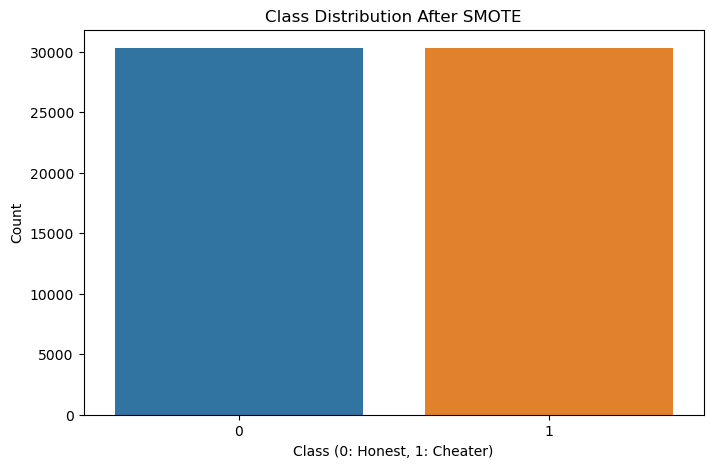

In [90]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()

In [91]:
# Train Linear Discriminant Analysis Classifier
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation
y_pred_lda = model_lda.predict(X_test)

# Metrics calculation for LDA model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

In [92]:
print(f"LDA - Accuracy: {accuracy_lda:.2f}")
print(f"LDA - Precision: {precision_lda:.2f}")
print(f"LDA - Recall: {recall_lda:.2f}")
print(f"LDA - F1 Score: {f1_lda:.2f}")

LDA - Accuracy: 0.39
LDA - Precision: 0.13
LDA - Recall: 0.64
LDA - F1 Score: 0.22


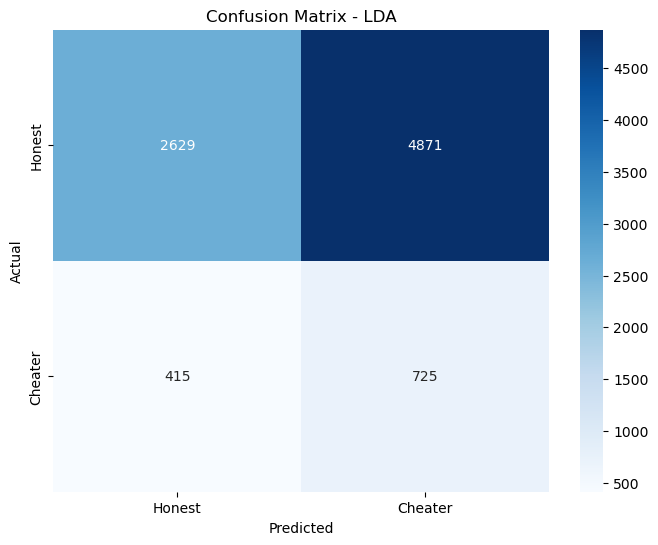

Classification Report - LDA:
               precision    recall  f1-score   support

           0       0.86      0.35      0.50      7500
           1       0.13      0.64      0.22      1140

    accuracy                           0.39      8640
   macro avg       0.50      0.49      0.36      8640
weighted avg       0.77      0.39      0.46      8640



In [93]:
# Confusion matrix for LDA model
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Honest', 'Cheater'],
            yticklabels=['Honest', 'Cheater'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LDA')
plt.show()

# Classification report for LDA model
report_lda = classification_report(y_test, y_pred_lda)
print("Classification Report - LDA:\n", report_lda)

# CNN- (Accuracy 59%, Recall 45%, Precision 14%)

In [94]:
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [95]:
# Load JSON data
def load_data(cheater_file, honest_file):
    with open(cheater_file) as f:
        cheaters_data = json.load(f)
    with open(honest_file) as f:
        honest_data = json.load(f)
    return cheaters_data, honest_data

In [99]:
# Preprocess data to extract features and labels
def preprocess_data(data, label):
    records = []
    for steam_id, matches in data.items():
        for match_id, events in matches.items():
            for event in events:
                if 'view_vel' in event and isinstance(event['view_vel'], list):
                    records.append({
                        'view_vel': np.mean(event['view_vel']),  # Mean of view_vel list
                        'label': label  # 1 for cheater, 0 for honest
                    })
    return pd.DataFrame(records)

In [101]:
# Load data
cheaters_data, honest_data = load_data('player_view_data_cheaters.json', 'player_view_data_honest.json')

# Preprocess data
cheaters_df = preprocess_data(cheaters_data, label=1)
honest_df = preprocess_data(honest_data, label=0)

In [102]:
# Combine datasets and shuffle
combined_df = pd.concat([cheaters_df, honest_df]).sample(frac=1).reset_index(drop=True)

# Check class distribution before SMOTE
print("Original class distribution:", Counter(combined_df['label']))

Original class distribution: Counter({0: 37804, 1: 5394})


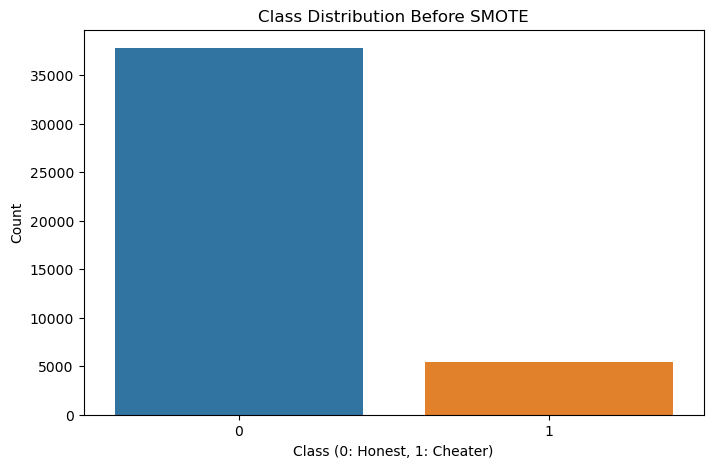

In [103]:
# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_df)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()

In [104]:
# Split the data into features and labels
X = combined_df['view_vel'].values.reshape(-1, 1, 1)  # Reshape for CNN (samples, timesteps, features)
y = combined_df['label'].values

# Check shapes of X and y to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (43198, 1, 1)
Shape of y: (43198,)


In [105]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

In [106]:
# Reshape X_train_resampled back to 3D for CNN
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 1, 1)

# Show the data distribution after applying SMOTE
print("Resampled training set class distribution:", Counter(y_train_resampled))

Resampled training set class distribution: Counter({0: 30221, 1: 30221})


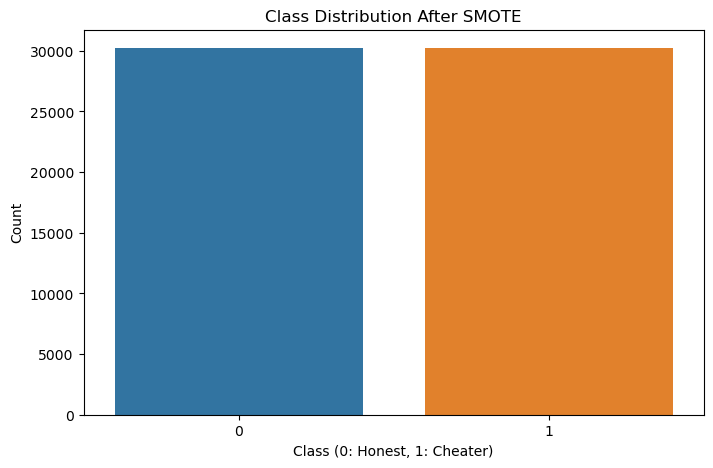

In [107]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class (0: Honest, 1: Cheater)')
plt.ylabel('Count')
plt.show()

In [108]:
# Define CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(1, 1)))
model_cnn.add(MaxPooling1D(pool_size=1))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# Compile model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [110]:
# Train model
model_cnn.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, verbose=0)

# Predictions and evaluation
y_pred_cnn = model_cnn.predict(X_test).flatten()
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [111]:
# Metrics calculation for CNN model
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn)
recall_cnn = recall_score(y_test, y_pred_cnn)
f1_cnn = f1_score(y_test, y_pred_cnn)

In [112]:
print(f"CNN - Accuracy: {accuracy_cnn:.2f}")
print(f"CNN - Precision: {precision_cnn:.2f}")
print(f"CNN - Recall: {recall_cnn:.2f}")
print(f"CNN - F1 Score: {f1_cnn:.2f}")


CNN - Accuracy: 0.59
CNN - Precision: 0.14
CNN - Recall: 0.45
CNN - F1 Score: 0.21


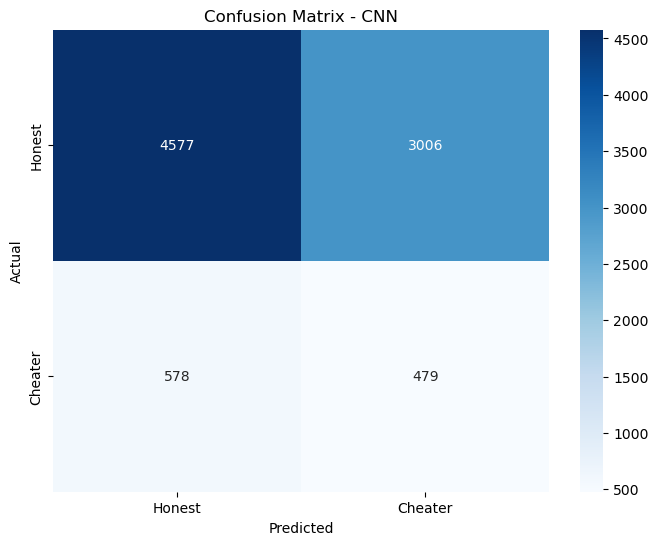

Classification Report - CNN:
               precision    recall  f1-score   support

           0       0.89      0.60      0.72      7583
           1       0.14      0.45      0.21      1057

    accuracy                           0.59      8640
   macro avg       0.51      0.53      0.46      8640
weighted avg       0.80      0.59      0.66      8640



In [113]:
# Confusion matrix for CNN model
conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Honest', 'Cheater'],
            yticklabels=['Honest', 'Cheater'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - CNN')
plt.show()

# Classification report for CNN model
report_cnn = classification_report(y_test, y_pred_cnn)
print("Classification Report - CNN:\n", report_cnn)

# DNN (Accuracy 83%, Recall 6%, Precision 15%)

In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [4]:
# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'label': label
                })
    return flattened_data

In [5]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection - ONLY view_vel
features = ['view_vel']
X = df[features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [7]:
# Build DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_res.shape[1]))  # Input layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5518 - loss: 0.6892 - val_accuracy: 0.0000e+00 - val_loss: 0.7802
Epoch 2/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5552 - loss: 0.6867 - val_accuracy: 0.0000e+00 - val_loss: 0.7961
Epoch 3/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5570 - loss: 0.6860 - val_accuracy: 0.0619 - val_loss: 0.7797
Epoch 4/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5543 - loss: 0.6865 - val_accuracy: 0.0841 - val_loss: 0.7949
Epoch 5/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5557 - loss: 0.6866 - val_accuracy: 0.0928 - val_loss: 0.7978
Epoch 6/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5632 - loss: 0.6849 - val_accuracy: 0.0000e+00 - val_loss: 0.8074
Epoch 7/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5560 - loss: 0.6863 - val_accuracy: 0.0373 - val_loss: 0.8023
Epoch 8/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5566 - lo

1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5582 - loss: 0.6852 - val_accuracy: 0.0654 - val_loss: 0.7947


In [8]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.83
Precision: 0.15
Recall: 0.06


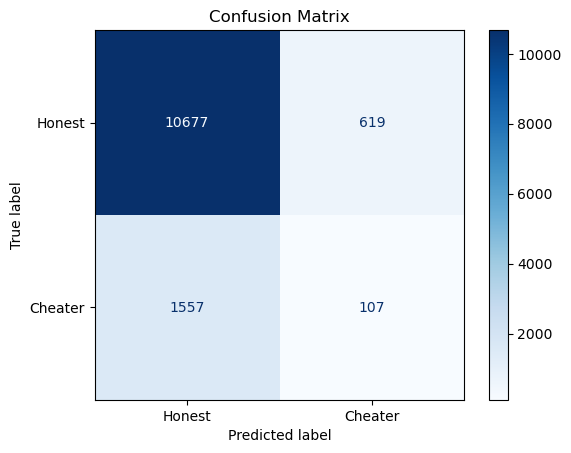

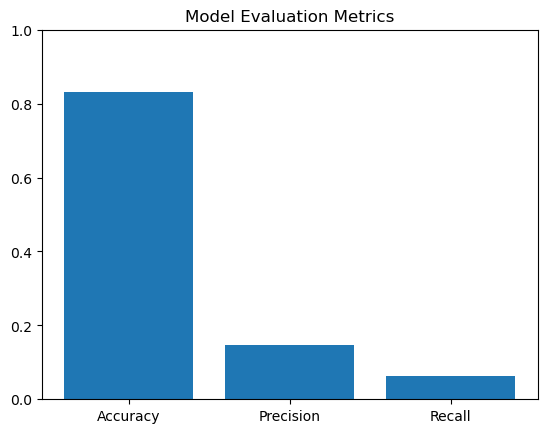

In [9]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

#          Part 2: More Data/Features

# Random Forest Classifier (Accuracy 73%, Recall 28%, Precision 17%)

In [79]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

In [80]:
# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [81]:
# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [82]:
# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = model.predict(X_test)


In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.73
Precision: 0.17
Recall: 0.28


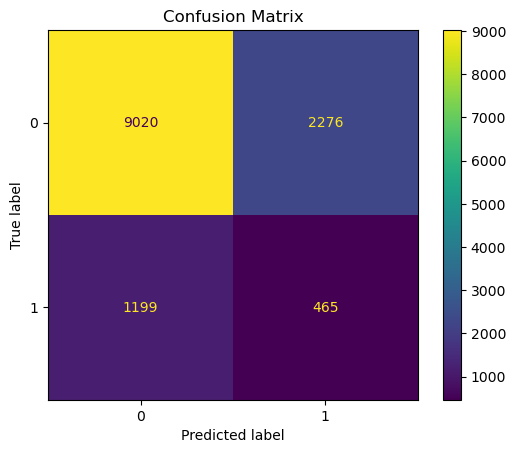

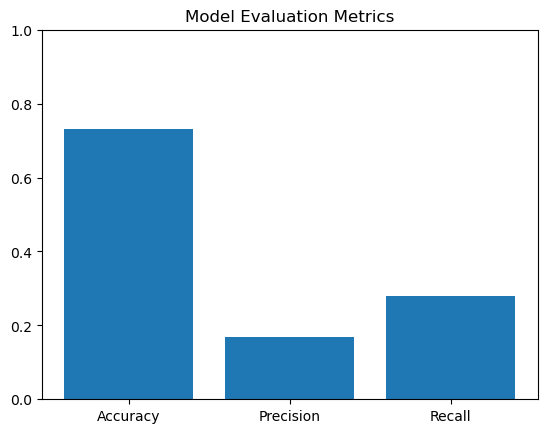

In [84]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# Linear Discriminant Analysis (Accuracy 53%, Recall 63%, Precision 16%)

In [85]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [86]:
# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

In [87]:
# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

In [88]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

In [89]:
# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

In [90]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [92]:
# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [93]:
# Train LDA model
lda = LDA()
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [94]:
# Predict on the test set
y_pred = lda.predict(X_test)


In [95]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [96]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")



Accuracy: 0.53
Precision: 0.16
Recall: 0.63


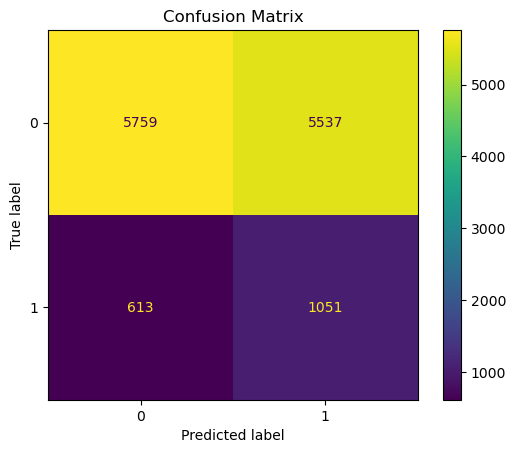

In [97]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

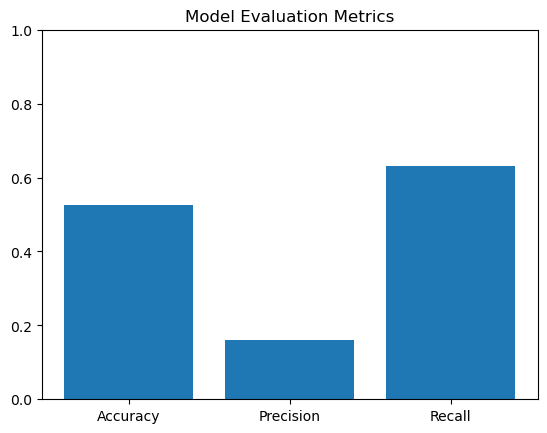

In [98]:
# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# Bernoulli Naive Bayes (Accuracy 61%, Recall 52%, Precision 17%)

Class distribution after SMOTE: [26508 26508]
Accuracy: 0.61
Precision: 0.17
Recall: 0.52


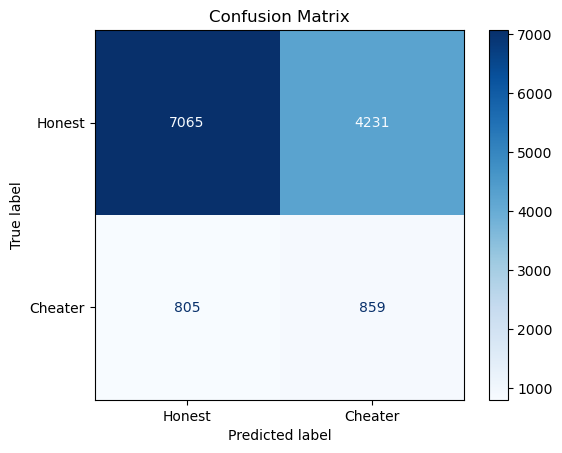

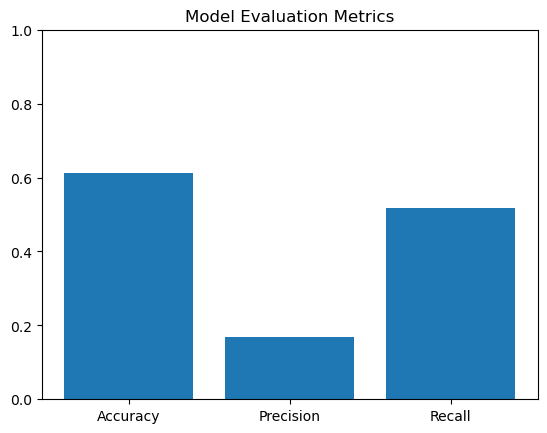

In [11]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB  # Changed to Bernoulli Naive Bayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer # Import Binarizer

# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                # Ensure player_vel is a single value
                if isinstance(kill['player_vel'], list):
                    kill['player_vel'] = np.mean(kill['player_vel'])
                # Ensure victim_vel is a single value
                if isinstance(kill['victim_vel'], list):
                    kill['victim_vel'] = np.mean(kill['victim_vel'])
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Binarize the features
binarizer = Binarizer(threshold=0)  # You may need to adjust the threshold.  Crucial step!
X = binarizer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

# Train Bernoulli Naive Bayes model
model = BernoulliNB()
model.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)  # Optional: Specify a colormap
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()


# RNN (Accuracy 80%, Recall 30%, Precision 26%)

In [10]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

In [12]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [15]:
# Reshape data for RNN (samples, time steps, features)
X_train_res = X_train_res.reshape(X_train_res.shape[0], 1, X_train_res.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [16]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, X_train_res.shape[2])))  # Adjust input_shape
model.add(Dense(1, activation='sigmoid'))  # Binary classification


C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,801 (10.94 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5790 - loss: 0.6762 - val_accuracy: 0.2510 - val_loss: 0.8181
Epoch 2/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6004 - loss: 0.6668 - val_accuracy: 0.3433 - val_loss: 0.7870
Epoch 3/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6092 - loss: 0.6630 - val_accuracy: 0.3370 - val_loss: 0.7843
Epoch 4/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6094 - loss: 0.6623 - val_accuracy: 0.3853 - val_loss: 0.7556
Epoch 5/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6115 - loss: 0.6611 - val_accuracy: 0.2369 - val_loss: 0.8638
Epoch 6/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6145 - loss: 0.6602 - val_accuracy: 0.3276 - val_loss: 0.8038
Epoch 7/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6147 - loss: 0.6579 - val_accuracy: 0.3893 - val_loss: 0.7575
Epoch 8/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6146 - loss: 0.6585 -

In [19]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.80
Precision: 0.26
Recall: 0.30


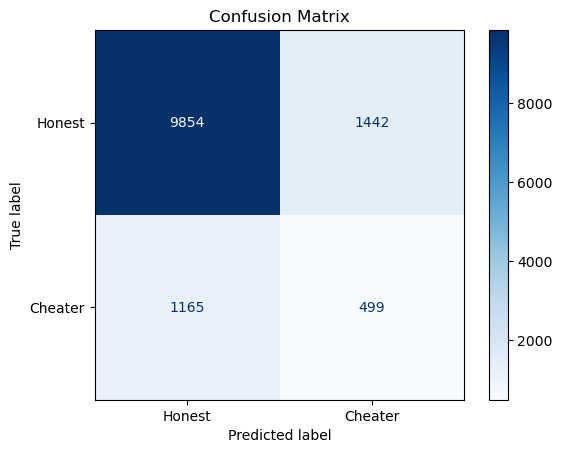

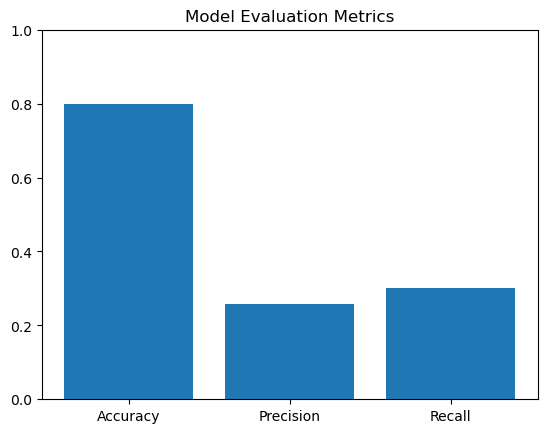

In [20]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# LSTM (Accuracy 74%, Recall 41%, Precision 22%)

In [22]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [23]:
# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

In [24]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']


In [25]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [27]:
# Reshape data for LSTM (samples, time steps, features)
X_train_res = X_train_res.reshape(X_train_res.shape[0], 1, X_train_res.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [28]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_res.shape[2])))  # Adjust input_shape
model.add(Dense(1, activation='sigmoid'))  # Binary classification

C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          11,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5756 - loss: 0.6797 - val_accuracy: 0.3729 - val_loss: 0.7657
Epoch 2/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5969 - loss: 0.6683 - val_accuracy: 0.3604 - val_loss: 0.7673
Epoch 3/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6080 - loss: 0.6639 - val_accuracy: 0.2833 - val_loss: 0.8202
Epoch 4/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6071 - loss: 0.6637 - val_accuracy: 0.3482 - val_loss: 0.7891
Epoch 5/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6142 - loss: 0.6596 - val_accuracy: 0.3286 - val_loss: 0.7989
Epoch 6/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6177 - loss: 0.6580 - val_accuracy: 0.3906 - val_loss: 0.7534
Epoch 7/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6187 - loss: 0.6573 - val_accuracy: 0.3169 - val_loss: 0.8139
Epoch 8/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6167 - loss: 0.6570 -

In [31]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.74
Precision: 0.22
Recall: 0.41


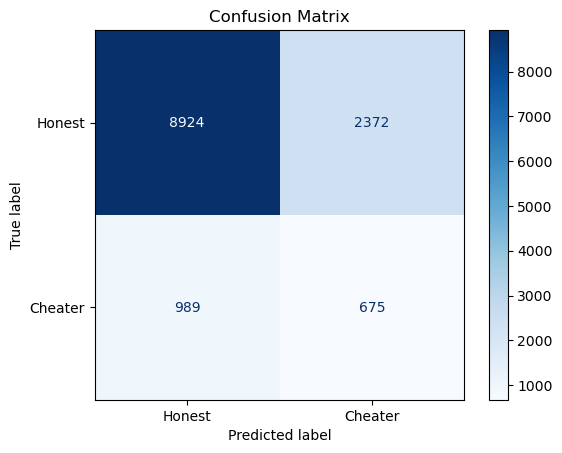

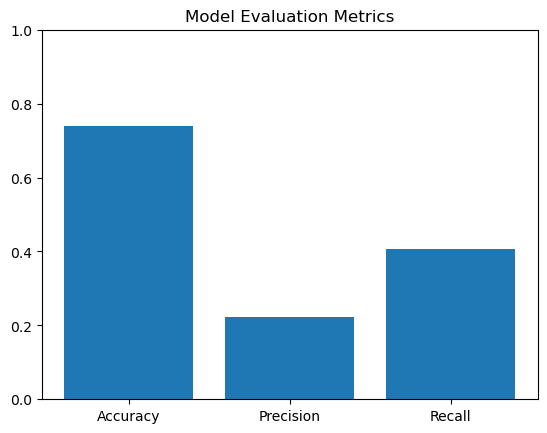

In [32]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# CNN (Accuracy 70%, Recall 49%, Precision, 21%)

In [33]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [34]:
# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

In [35]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

Class distribution after SMOTE: [26508 26508]


In [37]:
# Reshape data for CNN (samples, time steps, features)
X_train_res = X_train_res.reshape(X_train_res.shape[0], 1, X_train_res.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [38]:
# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train_res.shape[2])))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 64)               │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,621 (14.14 KB)

 Trainable params: 3,621 (14.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5816 - loss: 0.6758 - val_accuracy: 0.3255 - val_loss: 0.7887
Epoch 2/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6106 - loss: 0.6628 - val_accuracy: 0.4623 - val_loss: 0.7398
Epoch 3/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6133 - loss: 0.6592 - val_accuracy: 0.3365 - val_loss: 0.8026
Epoch 4/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6142 - loss: 0.6565 - val_accuracy: 0.3653 - val_loss: 0.7981
Epoch 5/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6169 - loss: 0.6523 - val_accuracy: 0.3944 - val_loss: 0.7732
Epoch 6/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6196 - loss: 0.6509 - val_accuracy: 0.3052 - val_loss: 0.8448
Epoch 7/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6205 - loss: 0.6511 - val_accuracy: 0.4625 - val_loss: 0.7235
Epoch 8/10
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6228 - loss: 0.6477 

In [41]:
# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.70
Precision: 0.21
Recall: 0.49


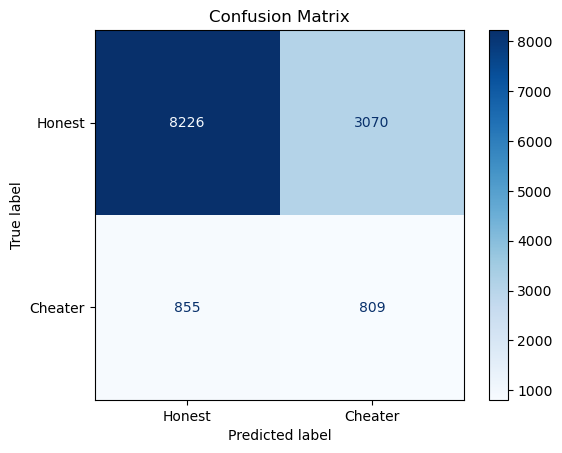

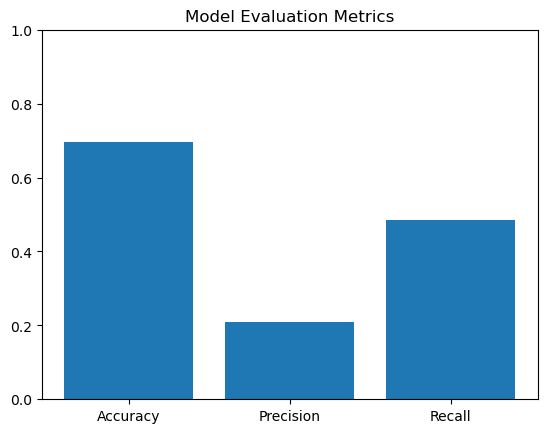

In [42]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()


# Deep Neural Network (Accuracy 74%, Recall 41%, Precision 23%)

Class distribution after SMOTE: [26508 26508]


C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5704 - loss: 0.6819 - val_accuracy: 0.2425 - val_loss: 0.8083
Epoch 2/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5857 - loss: 0.6735 - val_accuracy: 0.3691 - val_loss: 0.7723
Epoch 3/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5989 - loss: 0.6679 - val_accuracy: 0.2878 - val_loss: 0.7884
Epoch 4/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6012 - loss: 0.6661 - val_accuracy: 0.3352 - val_loss: 0.8008
Epoch 5/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6054 - loss: 0.6645 - val_accuracy: 0.4031 - val_loss: 0.7587
Epoch 6/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6065 - loss: 0.6638 - val_accuracy: 0.3742 - val_loss: 0.7701
Epoch 7/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6069 - loss: 0.6629 - val_accuracy: 0.3518 - val_loss: 0.7703
Epoch 8/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6089 - loss: 0.6632 

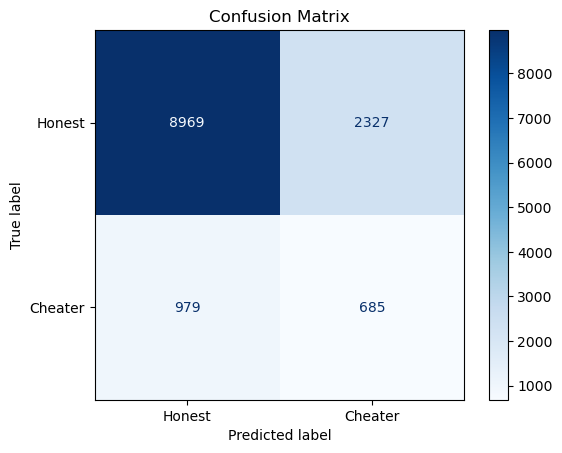

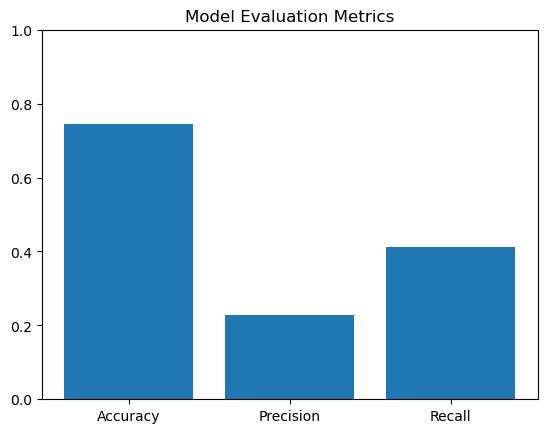

In [53]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Class distribution after SMOTE:", np.bincount(y_train_res))

# Build DNN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_res.shape[1]))  # Input layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_res, y_train_res, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Honest', 'Cheater'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.show()

# GANs (Wasserstein) (Accuracy %, Recall %, Precision %) - Requires More Resources to Train (Future Work)

In [54]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import backend as K

In [55]:
# Define the Wasserstein loss function
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

# Load data
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Flatten the data and ensure consistent feature lengths
def flatten_data(data, label):
    flattened_data = []
    for steam_id, matches in data.items():
        for match_id, kills in matches.items():
            for kill in kills:
                # Ensure view_vel is a single value (e.g., mean of the sequence)
                if isinstance(kill['view_vel'], list):
                    kill['view_vel'] = np.mean(kill['view_vel'])  # Use mean or another aggregation
                flattened_data.append({
                    'view_vel': kill['view_vel'],
                    'player_vel': kill['player_vel'],
                    'victim_vel': kill['victim_vel'],
                    'distance': kill['distance'],
                    'label': label
                })
    return flattened_data

In [56]:
# Load and process data
cheater_data = load_data('player_view_data_cheaters.json')
honest_data = load_data('player_view_data_honest.json')

cheater_flattened = flatten_data(cheater_data, 1)  # Label 1 for cheaters
honest_flattened = flatten_data(honest_data, 0)   # Label 0 for honest players

# Combine data into a single DataFrame
all_data = cheater_flattened + honest_flattened
df = pd.DataFrame(all_data)

# Feature selection
features = ['view_vel', 'player_vel', 'victim_vel', 'distance']
X = df[features]
y = df['label']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape data for GAN (no time steps needed)
input_dim = X_train.shape[1]  # Number of features
latent_dim = 10  # Size of the latent vector


In [58]:
# Build the Generator
generator = Sequential([
    Dense(32, activation='relu', input_dim=latent_dim),
    Dense(64, activation='relu'),
    Dense(input_dim, activation='tanh')  # Use tanh to bound the output
])

# Build the Discriminator (Critic)
discriminator = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1)  # No activation function for Wasserstein GAN
])

C:\Users\ehime\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Optimizer
optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

# Clip discriminator weights
def clip_weights(model, clip_value):
    for l in model.layers:
        weights = l.get_weights()
        weights = [np.clip(w, -clip_value, clip_value) for w in weights]
        l.set_weights(weights)

clip_value = 0.01

# Compile the Discriminator
discriminator.compile(optimizer=optimizer, loss=wasserstein_loss)

In [60]:
# Make the Discriminator non-trainable when training the Generator
discriminator.trainable = False

# Define the GAN model
gan_input = Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

In [62]:
# Compile the GAN model
gan.compile(optimizer=optimizer, loss=wasserstein_loss)


In [ ]:
# Training the GAN
epochs = 50
batch_size = 32
critic_iterations = 5

for epoch in range(epochs):
    for i in range(X_train.shape[0] // batch_size):
        # Train the critic multiple times
        for _ in range(critic_iterations):
            # Sample a batch of real images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            real_imgs = X_train[idx]

            # Generate a batch of fake images
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_imgs = generator.predict(noise)

            # Train the critic
            critic_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)) * -1)  # Real images labeled as -1
            critic_loss_fake = discriminator.train_on_batch(fake_imgs, np.ones((batch_size, 1)))       # Fake images labeled as 1
            critic_loss = 0.5 * (critic_loss_real + critic_loss_fake)

            # Clip discriminator weights
            clip_weights(discriminator, clip_value)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)) * -1)  # Generator wants critic to think fake images are real (-1)
 # Print progress
print(f"Epoch {epoch}, Critic Loss: {critic_loss}, Generator Loss: {generator_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
# Generate synthetic samples
num_synthetic_samples = len(X_train)  # Generate same number of samples as training set
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))
X_synthetic = generator.predict(noise)

In [ ]:
# Combine synthetic samples with real training data
X_train_combined = np.concatenate([X_train, X_synthetic])
y_synthetic = np.zeros(num_synthetic_samples)  # Label synthetic samples as 0 (or -1, depending on your goal)
y_train_combined = np.concatenate([y_train, y_synthetic])

In [ ]:
# Now train a classifier on the combined data
classifier = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_combined, y_train_combined, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

In [ ]:
# Evaluate the classifier
y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")